In [1]:
import pandas as pd
from datetime import datetime, timedelta
import plotly.graph_objects as go
import opstrat as op
from yahoo_fin.stock_info import get_data

/var/folders/1x/4jypbkmx6rz03t2116nn6_g00000gn/T/ipykernel_27038/3574296549.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('~/Downloads/RHTradeHistory (1).csv', index_col=False)


,date,time,type,symbol,action,quantity,price,amount,fees,details
0,9/2/2022,7:13:00 AM,option,TSLA $265 Call 9/2/2022,BTC,1.000000,12.10,1210.0,0,Part of Consolidated Transaction (such as an I...
1,9/2/2022,7:13:00 AM,option,TSLA $265 Call 9/9/2022,STO,1.000000,15.05,1505.0,0,Part of Consolidated Transaction (such as an I...
2,9/1/2022,10:34:00 AM,stock,TSLA,Buy,0.110967,270.35,30.0,0,NaN
3,9/1/2022,11:32:00 AM,option,TSLA $273.33 Call 9/2/2022,BTC,1.000000,3.38,338.0,0,Part of Consolidated Transaction (such as an I...
4,9/1/2022,11:32:00 AM,option,TSLA $280 Call 9/2/2022,STO,1.000000,0.97,97.0,0,Part of Consolidated Transaction (such as an I...


In [ ]:
df = pd.read_csv('~/Downloads/RHTradeHistory (1).csv', index_col=False)
df.head()

In [2]:
df = df[df['type'] == 'option']

In [3]:
def parse_type(symbol_col):
    symbol_df = pd.DataFrame(index=symbol_col.index, columns=['ticker', 'strike', 'option_type', 'expiration'])
    for i in range(len(symbol_col)):
        parsed_data = symbol_col.iloc[i].split(' ')
        # if not np.all(np.array(parsed_data) == 'TSLA'):
        symbol_df.iloc[i] = parsed_data
    return symbol_df

def parse_action(action_col):
    action_df = pd.DataFrame(index=action_col.index, columns=['transaction', 'state'])
    for i in range(len(action_col)):
        parsed_data = action_col.iloc[i].split('T')
        action_df.iloc[i] = parsed_data
    return action_df

In [4]:
symbol_df = parse_type(df['symbol'])
action_df = parse_action(df['action'])
df = pd.concat((df, symbol_df, action_df), axis=1)

In [5]:
df = df.drop(labels=['type', 'symbol', 'fees', 'ticker', 'details ', 'action', 'amount'], axis=1)

In [6]:
df

,date,time,quantity,price,strike,option_type,expiration,transaction,state
0,9/2/2022,7:13:00 AM,1.0,12.10,$265,Call,9/2/2022,B,C
1,9/2/2022,7:13:00 AM,1.0,15.05,$265,Call,9/9/2022,S,O
3,9/1/2022,11:32:00 AM,1.0,3.38,$273.33,Call,9/2/2022,B,C
4,9/1/2022,11:32:00 AM,1.0,0.97,$280,Call,9/2/2022,S,O
5,9/1/2022,8:04:00 AM,2.0,5.82,$265,Call,9/2/2022,S,O
6,9/1/2022,8:04:00 AM,2.0,2.41,$271.67,Call,9/2/2022,B,C
7,9/1/2022,8:04:00 AM,2.0,13.87,$265,Call,9/16/2022,B,O
8,9/1/2022,8:04:00 AM,2.0,10.31,$271.67,Call,9/16/2022,S,C
10,8/31/2022,6:32:00 AM,1.0,1.59,$268.33,Put,9/2/2022,S,C
11,8/31/2022,6:32:00 AM,1.0,1.95,$270,Put,9/2/2022,B,C


In [7]:
df = df.loc[::-1].reset_index(drop=True)

In [8]:
df

,date,time,quantity,price,strike,option_type,expiration,transaction,state
0,8/26/2022,7:00:00 AM,3.0,31.04,$271.67,Call,9/16/2022,B,O
1,8/26/2022,7:00:00 AM,3.0,35.21,$266.67,Call,9/16/2022,S,C
2,8/26/2022,7:00:00 AM,3.0,8.03,$290,Call,8/26/2022,S,O
3,8/26/2022,7:00:00 AM,3.0,12.75,$285,Call,8/26/2022,B,C
4,8/26/2022,12:01:00 PM,3.0,0.46,$290,Call,8/26/2022,B,C
5,8/26/2022,12:40:00 PM,3.0,2.81,$301.67,Call,9/2/2022,S,O
6,8/29/2022,6:33:00 AM,3.0,1.37,$301.67,Call,9/2/2022,B,C
7,8/29/2022,6:33:00 AM,3.0,8.66,$280,Call,9/2/2022,S,O
8,8/30/2022,7:31:00 AM,1.0,1.56,$270,Put,9/2/2022,S,O
9,8/30/2022,7:31:00 AM,1.0,1.31,$268.33,Put,9/2/2022,B,O


In [9]:
def expand_df(df):
    expanded_df = pd.DataFrame(index=np.arange(np.sum(df['quantity']), dtype=np.int), columns=df.columns)
    exp_ind = 0
    for ind, df_row in df.iterrows():
        quantity = int(df_row['quantity'])
        df_row['quantity'] = 1.
        expanded_df.iloc[exp_ind:exp_ind+quantity] = df_row
        # expanded_df.iloc[exp_ind:exp_ind+quantity]['quantity'] = 1.0
        exp_ind += quantity
    return expanded_df

In [10]:
df = expand_df(df)
df

,date,time,quantity,price,strike,option_type,expiration,transaction,state
0,8/26/2022,7:00:00 AM,1.0,31.04,$271.67,Call,9/16/2022,B,O
1,8/26/2022,7:00:00 AM,1.0,31.04,$271.67,Call,9/16/2022,B,O
2,8/26/2022,7:00:00 AM,1.0,31.04,$271.67,Call,9/16/2022,B,O
3,8/26/2022,7:00:00 AM,1.0,35.21,$266.67,Call,9/16/2022,S,C
4,8/26/2022,7:00:00 AM,1.0,35.21,$266.67,Call,9/16/2022,S,C
5,8/26/2022,7:00:00 AM,1.0,35.21,$266.67,Call,9/16/2022,S,C
6,8/26/2022,7:00:00 AM,1.0,8.03,$290,Call,8/26/2022,S,O
7,8/26/2022,7:00:00 AM,1.0,8.03,$290,Call,8/26/2022,S,O
8,8/26/2022,7:00:00 AM,1.0,8.03,$290,Call,8/26/2022,S,O
9,8/26/2022,7:00:00 AM,1.0,12.75,$285,Call,8/26/2022,B,C


In [11]:
def create_option_plays(df):
    option_opens = df[df['state'] == 'O'].reset_index(drop=True)
    option_closes = df[df['state'] == 'C'].reset_index(drop=True)
    option_plays = pd.DataFrame(index=np.arange(len(option_opens)),
                                columns=['open', 'close', 'expiration',  'strike', 'option_type', 'quantity', 'filled', 'closed', 'P/L'])
    for ind, row in option_opens.iterrows():
        option_plays.iloc[ind] = list(row[['date']]) + [0] + list(row[['expiration', 'strike', 'option_type','quantity', 'price']]) + [np.nan, 0]
        if row['transaction'] == 'B':
            option_plays.iloc[ind]['filled'] *= -1

    name_list = ['strike', 'option_type', 'expiration']
    for ind, play_row in option_plays.iterrows():
        match_ind = (option_closes[name_list] == play_row[name_list]).all(axis=1)
        matched_df = option_closes.loc[match_ind]
        if len(matched_df) > 0:
            option_plays.iloc[ind]['close'] = matched_df.iloc[0]['date']
            option_plays.iloc[ind]['closed'] = matched_df.iloc[0]['price']
            if matched_df.iloc[0]['transaction'] == 'S':
                option_plays.iloc[ind]['closed'] *= -1
            option_closes = option_closes.drop(matched_df.index[0], axis=0)
            
    option_plays['P/L'] = option_plays['filled'] - option_plays['closed']
    return option_plays
option_plays = create_option_plays(df)

In [12]:
option_plays

,open,close,expiration,strike,option_type,quantity,filled,closed,P/L
0,8/26/2022,9/1/2022,9/16/2022,$271.67,Call,1.0,-31.04,-10.31,-20.73
1,8/26/2022,9/1/2022,9/16/2022,$271.67,Call,1.0,-31.04,-10.31,-20.73
2,8/26/2022,0,9/16/2022,$271.67,Call,1.0,-31.04,NaN,NaN
3,8/26/2022,8/26/2022,8/26/2022,$290,Call,1.0,8.03,0.46,7.57
4,8/26/2022,8/26/2022,8/26/2022,$290,Call,1.0,8.03,0.46,7.57
5,8/26/2022,8/26/2022,8/26/2022,$290,Call,1.0,8.03,0.46,7.57
6,8/26/2022,8/29/2022,9/2/2022,$301.67,Call,1.0,2.81,1.37,1.44
7,8/26/2022,8/29/2022,9/2/2022,$301.67,Call,1.0,2.81,1.37,1.44
8,8/26/2022,8/29/2022,9/2/2022,$301.67,Call,1.0,2.81,1.37,1.44
9,8/29/2022,8/30/2022,9/2/2022,$280,Call,1.0,8.66,5.58,3.08


<AxesSubplot:>

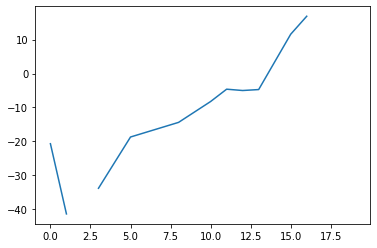

In [14]:
option_plays['P/L'].cumsum().plot()

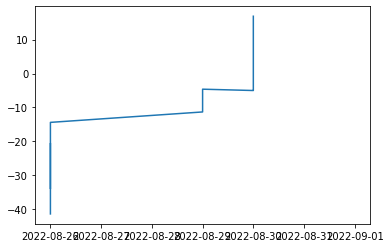

In [15]:
import matplotlib.pyplot as plt
plt.plot(pd.to_datetime(option_plays['open']),option_plays['P/L'].cumsum())

In [91]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%m/%d/%Y")
    d2 = datetime.strptime(d2, "%m/%d/%Y")
    return abs((d2 - d1).days)

In [93]:
ndays = days_between('8/30/2022', '9/30/2022')
nweeks = ndays//7 
nweeks, ndays%7

(4, 3)

In [53]:
17*7 + 2

121

In [234]:
def get_tsla(start_date='8/8/2022', end_date='9/3/2022', yahoo_max_days=7, effectve_split_date='8/25/2022', 
             timezone_offset=4):
    ndays = days_between(start_date, end_date)
    nweeks = ndays // yahoo_max_days 
    if ndays % yahoo_max_days >0:
        nweeks += 1
    end_date = datetime.strptime(end_date, "%m/%d/%Y")
    start_date = datetime.strptime(start_date, "%m/%d/%Y")
    effectve_split_date = datetime.strptime(effectve_split_date, "%m/%d/%Y")
    tsla = pd.DataFrame(columns=['open','high','low','close','volume','ticker'])
    for i in range(nweeks):
        week_end = end_date - timedelta(days=i*yahoo_max_days)
        week_start = end_date - timedelta(days=(i+1)*yahoo_max_days)
        if week_start < start_date:
            week_start = start_date
        tsla_week = get_data("tsla", start_date=datetime.strftime(week_start, "%m/%d/%Y"), 
                             end_date=datetime.strftime(week_end, "%m/%d/%Y"), 
                             index_as_date = True, interval="1m")
        tsla = pd.concat((tsla, tsla_week), axis=0)
    tsla.loc[tsla.index < effective_split_date, ['open','high','low','close']] /= 3
    tsla.index -= timedelta(hours=timezone_offset)
    return tsla

In [235]:
tsla = get_tsla()

In [242]:
option_plays

,open,close,expiration,strike,option_type,quantity,filled,closed,P/L
0,8/26/2022,9/1/2022,9/16/2022,$271.67,Call,1.0,-31.04,-10.31,-20.73
1,8/26/2022,9/1/2022,9/16/2022,$271.67,Call,1.0,-31.04,-10.31,-20.73
2,8/26/2022,0,9/16/2022,$271.67,Call,1.0,-31.04,NaN,NaN
3,8/26/2022,8/26/2022,8/26/2022,$290,Call,1.0,8.03,0.46,7.57
4,8/26/2022,8/26/2022,8/26/2022,$290,Call,1.0,8.03,0.46,7.57
5,8/26/2022,8/26/2022,8/26/2022,$290,Call,1.0,8.03,0.46,7.57
6,8/26/2022,8/29/2022,9/2/2022,$301.67,Call,1.0,2.81,1.37,1.44
7,8/26/2022,8/29/2022,9/2/2022,$301.67,Call,1.0,2.81,1.37,1.44
8,8/26/2022,8/29/2022,9/2/2022,$301.67,Call,1.0,2.81,1.37,1.44
9,8/29/2022,8/30/2022,9/2/2022,$280,Call,1.0,8.66,5.58,3.08


In [243]:
tsla = get_tsla('8/26/2022')

In [245]:
def plot_candles(df, show_afterhours=False):
    fig = go.Figure(data=[go.Candlestick(x=df.index,
            open=df['open'],
            high=df['high'],
            low=df['low'],
            close=df['close'])])
    if not show_afterhours:
        fig.update_xaxes(
            rangeslider_visible=True,
            rangebreaks=[
                # NOTE: Below values are bound (not single values), ie. hide x to y
                dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
                dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
                # dict(values=["2020-12-25", "2021-01-01"])  # hide holidays (Christmas and New Year's, etc)
            ]
        )
        fig.update_layout(
            title='Stock Analysis',
            yaxis_title=f'TSLA Stock'
        )

    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.show()

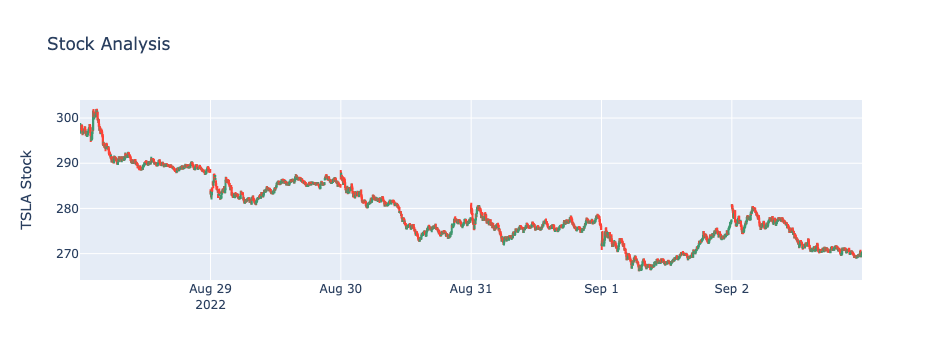

In [246]:
plot_candles(tsla)

In [29]:
option_plays[(option_plays['expiration'] == '9/2/2022') & (option_plays['strike'] == '$273.33')]

,open,close,expiration,strike,option_type,quantity,filled,closed,P/L
16,8/30/2022,9/1/2022,9/2/2022,$273.33,Call,1.0,8.69,3.38,0


In [72]:
import opstrat as op
#Declare parameters
K=200    #spot price
St=208   #current stock price
r=3.2      #4% risk free rate
t=30     #time to expiry, 30 days 
v=20     #volatility 
type='c' #Option type call
#Black Scholes Model
bsm=op.black_scholes(K=K, St=St, r=r, t=t, 
                     v=v, type='c')
bsm

{'value': {'option value': 10.110842067482452,
  'intrinsic value': 8,
  'time value': 2.1108420674824515},
 'greeks': {'delta': 0.7759431769519206,
  'gamma': 0.02508718572191462,
  'theta': -0.07273581068792007,
  'vega': 0.17841731557362972,
  'rho': 0.12434411403165782}}

In [74]:
K=270    #spot price
St=270   #current stock price
r=3.2      #4% risk free rate
t=7     #time to expiry, 30 days 
v=50.69     #volatility 
type='c' #Option type call
#Black Scholes Model
bsm=op.black_scholes(K=K, St=St, r=r, t=t, 
                     v=v, type='c')
bsm

{'value': {'option value': 7.640580340369951,
  'intrinsic value': 0,
  'time value': 7.640580340369951},
 'greeks': {'delta': 0.5174845881337765,
  'gamma': 0.021028294504828106,
  'theta': -0.5511564803605808,
  'vega': 0.14902497095449338,
  'rho': 0.025330460525760223}}

In [91]:
K=275    #spot price
St=270.23   #current stock price
r=3.2      #4% risk free rate
t=7     #time to expiry, 30 days 
v=46     #volatility 
type='c' #Option type call
#Black Scholes Model
bsm=op.black_scholes(K=K, St=St, r=r, t=t, 
                     v=v, type='c')
bsm['value']['option value'], bsm['greeks']

(4.865963004398225,
 {'delta': 0.40780700317631746,
  'gamma': 0.022553199532061235,
  'theta': -0.4866191642545752,
  'vega': 0.1452908591559878,
  'rho': 0.020201371623221})

In [97]:
tsla = get_data("tsla", start_date="08/01/2022", end_date="09/02/2022", index_as_date = True, interval="1d")
tsla

,open,high,low,close,adjclose,volume,ticker
2022-08-01,301.276672,311.876678,295.000000,297.276672,297.276672,117042900,TSLA
2022-08-02,294.003326,307.833344,292.666656,300.586670,300.586670,95577600,TSLA
2022-08-03,305.000000,309.549988,301.149994,307.396667,307.396667,80091000,TSLA
2022-08-04,311.000000,313.606659,305.000000,308.633331,308.633331,72256200,TSLA
2022-08-05,302.670013,304.606659,285.543335,288.170013,288.170013,113172900,TSLA
2022-08-08,295.000000,305.200012,289.086670,290.423340,290.423340,98994000,TSLA
2022-08-09,290.293335,292.396667,279.353333,283.333344,283.333344,86244600,TSLA
2022-08-10,297.066681,297.510010,283.369995,294.356659,294.356659,94918800,TSLA
2022-08-11,296.513336,298.236664,285.833344,286.630005,286.630005,70155000,TSLA
2022-08-12,289.416656,300.160004,285.033325,300.029999,300.029999,79657200,TSLA
